# Introduction

Our project is a data analysis which aims to identify the correlations, if any, between an individual’s music tastes, listening habits, and self reported mental health.
With our findings, we aim to provide useful insight for professional music therapists in order to better understand the relation between music and their patients.

### About the Data

The dataset used was obtained on Kaggle from the creator, Catherine Rasgaitas. Data is comprised of survey results from respondants via a Google Form. The form was posted in various places online including Reddit, Discord, and social media platforms. The form was also advertised in various physical locations such as libraries, parks, and other public locations. The survey was intentionally created to be brief so that respondants would be more likely to finish. Certain sections including "BPM" were marked as optional to allow for quicker completion.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
import seaborn as sns

In [51]:
df = pd.read_csv("survey.csv")

# (0) Data Cleaning

In [52]:
# Drop BPM column and all NaN values
df.drop(columns=["BPM"], inplace=True)
df = df.dropna()
# DF now includes a total of 718 rows

In [53]:
# Change Age, Anxiety, Depression, Insomnia, and OCD columns to int from float
df["Age"] = df["Age"].astype("int")
df["Anxiety"] = df["Anxiety"].astype("int")
df["Depression"] = df["Depression"].astype("int")
df["Insomnia"] = df["Insomnia"].astype("int")
df["OCD"] = df["OCD"].astype("int")

In [54]:
# Create Mental Health Dataframe
mh_df = df[["Anxiety", "Depression", "Insomnia", "OCD"]].copy()

In [55]:
# Create Total Health Score Column
df["Total Health Score"] = df["Anxiety"] + df["Depression"] + df["Insomnia"] + df["OCD"]

We chose to drop the entire BPM column due to a large amount of missing data. We also discussed how the general public does not have an informed enough understanding of BPM to give accurate and valuable data here.  We then dropped all rows with NaN as that only removed 19 rows of data out of 737 and would make our analysis simpler. We created a "Total Health Score" column to compare overall mental health ratings. Lastly, we simply cast all floats, besides "Hours Listening Per Day", to integers as they were already whole numbers.

# (1) Understanding the Audience

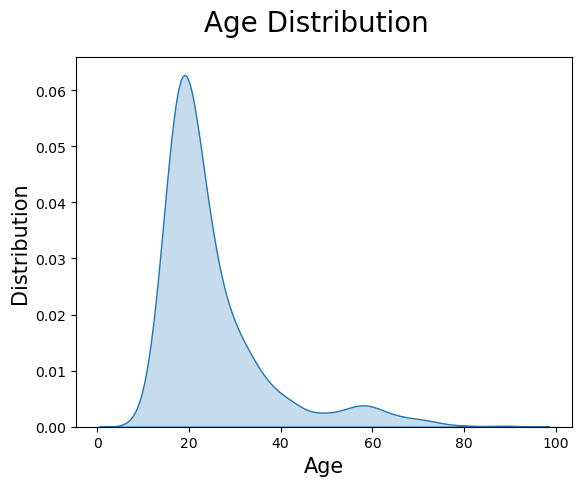

In [75]:
# Age Distribution
fig = sns.kdeplot(df["Age"], shade=True)
fig.figure.suptitle("Age Distribution", fontsize = 20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.show()

17-22 years old is the age range most represented in the survey.  This could potentially skew the data in our analysis because of such a saturation in this age range.

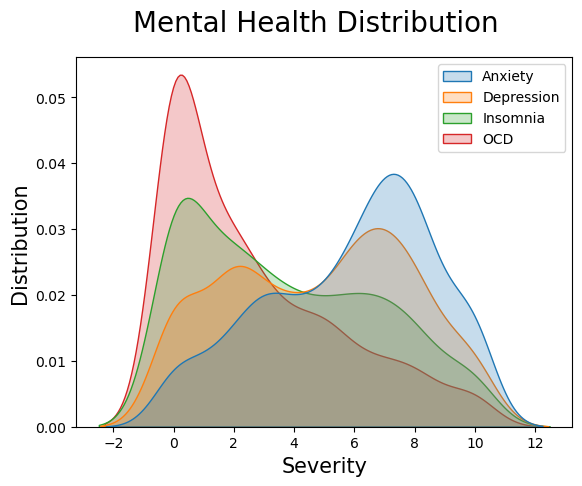

In [76]:
# Mental Health Distribution
fig = sns.kdeplot(data=mh_df, shade=True)
fig.figure.suptitle("Mental Health Distribution", fontsize = 20)
plt.xlabel('Severity', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.show()

Most people either identify as not having the mental health concern or having a high amount of that concern. There is a dip in the middle of sverity. Most people identify as having high anxiety and depression in relation to the other health concerns and OCD was extremely low.

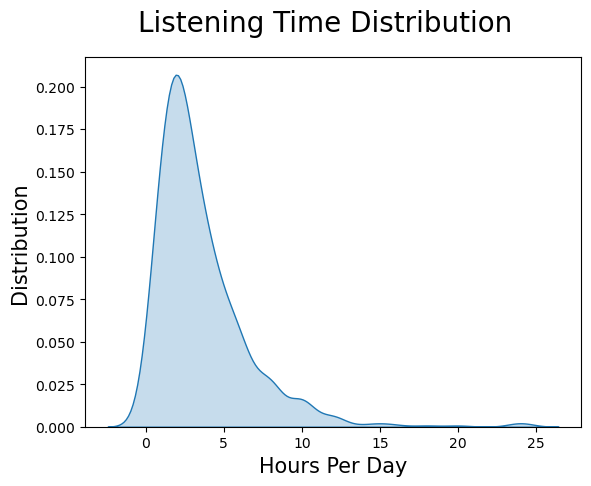

In [79]:
# Hours Per Day Distribution
fig= sns.kdeplot(df["Hours per day"], shade=True)
fig.figure.suptitle("Listening Time Distribution", fontsize = 20)
plt.xlabel('Hours Per Day', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.show()

Our respondants listen to an average of 3.59 hours per day with the highest reported being 2 hours per day.  This can also skew our data as we do not have an even distribution of all hours per day.

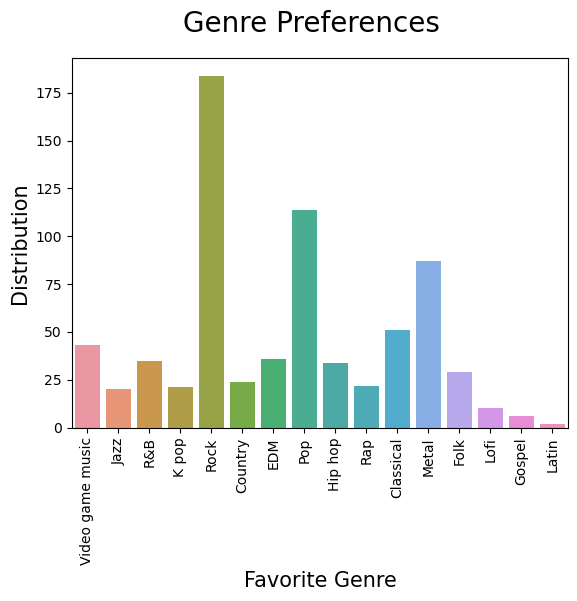

In [80]:
# Genre Breakdown by Count
fig = sns.countplot(x=df['Fav genre'])
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preferences", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Distribution', fontsize=15)
plt.show()

The overwhelning majority of respondants say their favorite genre is either Rock, Pop, Metal, or Classical.

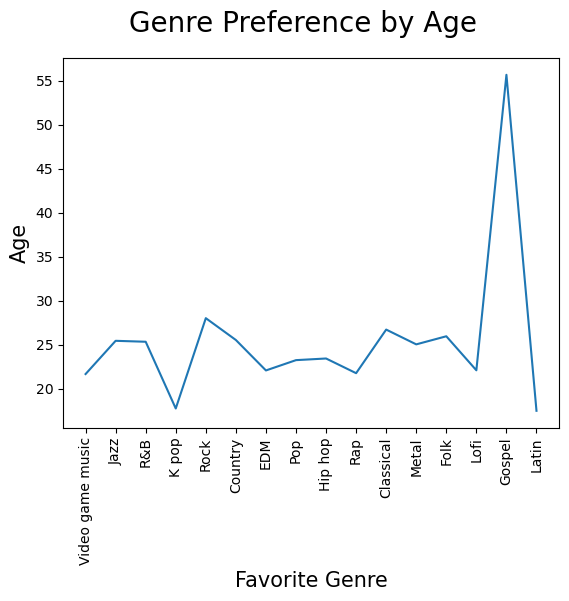

In [50]:
# Genre Breakdown by Age
fig = sns.lineplot(x=df['Fav genre'], y=df['Age'], ci=None)
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preference by Age", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Age', fontsize=15)
plt.show()

In the age breakdown, KPOP and Latin have the youngest demographic. Rock listeners are around 30 years old and Gospel music has the highest age demographic of around 55 years old.

# (2) Data Analysis

## Mental Health and Listening to Music While Working

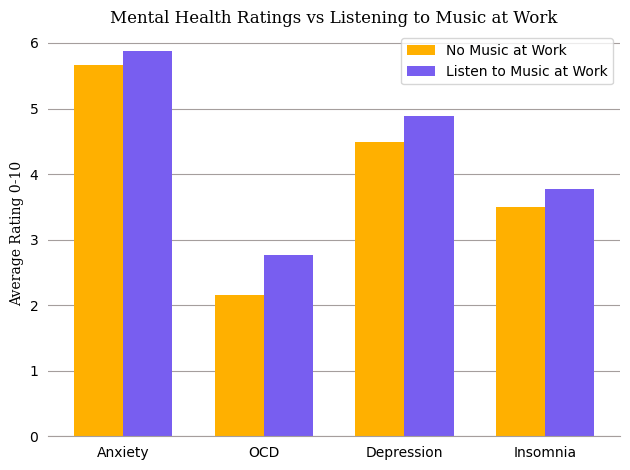

In [66]:
#Mental Health Ratings vs Listening to Music at Work
df_no = df[df['While working'] == 'No']
df_yes = df[df['While working'] == 'Yes'] 

#anxiety data
no_work_anxiety = df_no["Anxiety"].tolist()
yes_work_anxiety = df_yes["Anxiety"].tolist()
mean_no_work_anxiety = mean(no_work_anxiety)
mean_yes_work_anxiety = mean(yes_work_anxiety)

#OCD data
no_work_OCD = df_no["OCD"].tolist()
yes_work_OCD = df_yes["OCD"].tolist()
mean_no_work_OCD = mean(no_work_OCD)
mean_yes_work_OCD = mean(yes_work_OCD)

#depression data
no_work_depression = df_no["Depression"].tolist()
yes_work_depression = df_yes["Depression"].tolist()
mean_no_work_depression = mean(no_work_depression)
mean_yes_work_depression = mean(yes_work_depression)

#Insomnia data
no_work_insomnia = df_no["Insomnia"].tolist()
yes_work_insomnia = df_yes["Insomnia"].tolist()
mean_no_work_insomnia = mean(no_work_insomnia)
mean_yes_work_insomnia = mean(yes_work_insomnia)

sfont = {"fontname": "serif"}
labels = ["Anxiety", "OCD", "Depression", "Insomnia"]
yes_means = [mean_yes_work_anxiety, mean_yes_work_OCD, mean_yes_work_depression, mean_yes_work_insomnia]
no_means = [mean_no_work_anxiety, mean_no_work_OCD, mean_no_work_depression, mean_no_work_insomnia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_means, width, label='No Music at Work', color="#FFB000")  # color blind friendly yellow
rects2 = ax.bar(x + width/2, yes_means, width, label='Listen to Music at Work', color="#785EF0")  # color blind friendly purple

ax.set_ylabel('Average Rating 0-10', **sfont)
ax.set_title('Mental Health Ratings vs Listening to Music at Work', **sfont)
ax.set_xticks(x, labels)
ax.legend()

# spines are the top, bottom, left, right lines
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("#A59E9D")
ax.tick_params(bottom=False, left=False)  # gets rid on ticks on x and y axes
ax.set_axisbelow(True)  # puts axis lines below bars
ax.yaxis.grid(True, color="#A59E9D")  # adds y axis lines

fig.tight_layout()

plt.show()

This shows that those who listen to work actually have a worse mental health score for all categories.

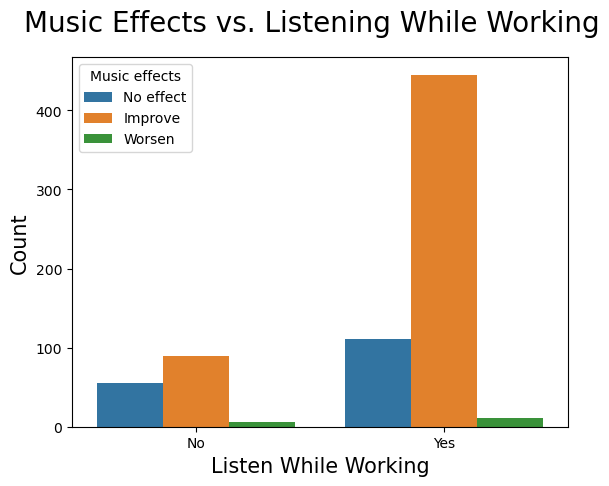

In [82]:
# Music Effects vs. Listening to Music While Working
fig = sns.countplot(x=df['While working'], hue=df["Music effects"])
fig.figure.suptitle("Music Effects vs. Listening While Working", fontsize = 20)
plt.xlabel('Listen While Working', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Illustrates that people who listen to music while working have overwhelmingly more improvements from music than people who do not listen to music while working.

## Music Effects in Respondants With Exploratory Tendencies

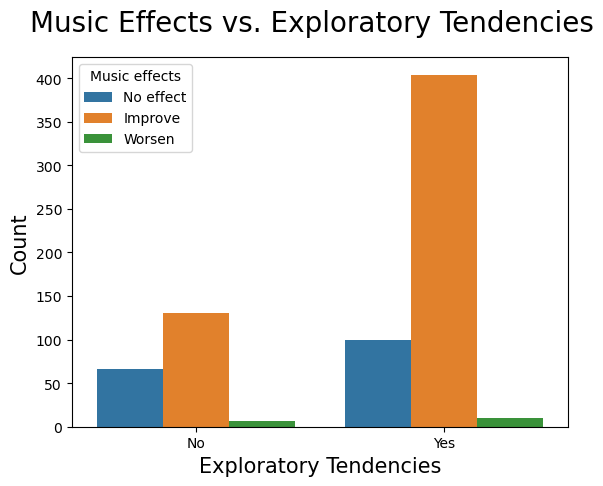

In [83]:
# Music Effects vs. Exploratory Tendencies
fig = sns.countplot(x=df['Exploratory'], hue=df["Music effects"])
fig.figure.suptitle("Music Effects vs. Exploratory Tendencies", fontsize = 20)
plt.xlabel('Exploratory Tendencies', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

This chart demonstrates that people who identify as having exploratory tendencies in their music selection also see a much greater improvement from music.

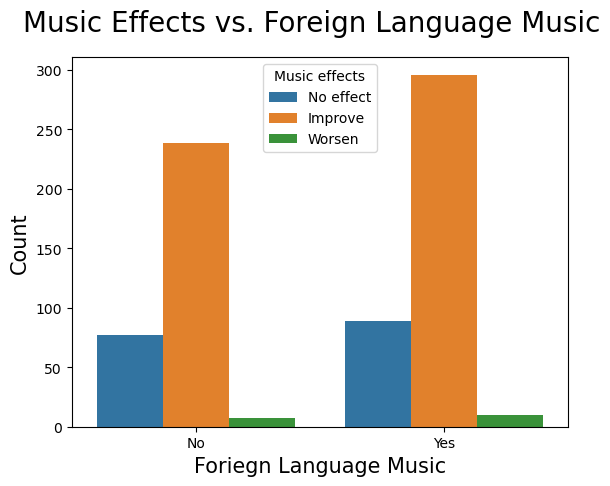

In [84]:
# Music Effects vs. Foreign Language Music
fig = sns.countplot(x=df['Foreign languages'], hue=df["Music effects"], order=("No", "Yes"))
fig.figure.suptitle("Music Effects vs. Foreign Language Music", fontsize = 20)
plt.xlabel('Foriegn Language Music', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

This mirrors the other chart, showing that people who listen to music in foreign languages report that music improves......

## Musical Background

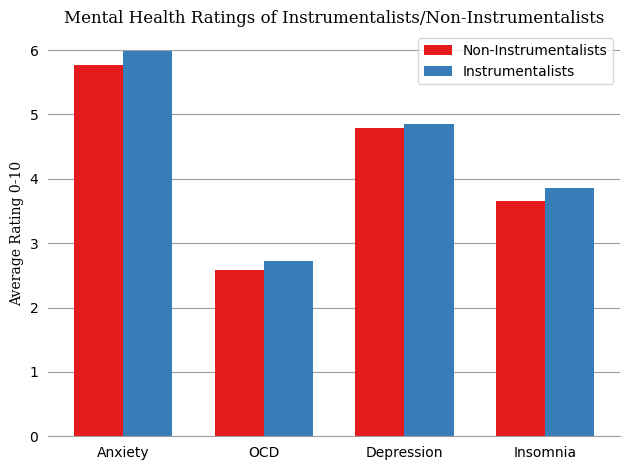

In [64]:
#Groupings of data of Instrumentalists vs non-instrumentalists
df_no = df[df['Instrumentalist'] == 'No'] 
df_yes = df[df['Instrumentalist'] == 'Yes'] 

#anxiety data
non_instrumentalist_anxiety = df_no["Anxiety"].tolist()
instrumentalist_anxiety = df_yes["Anxiety"].tolist()
mean_non_instrumentalist_anxiety = mean(non_instrumentalist_anxiety)
mean_instrumentalist_anxiety = mean(instrumentalist_anxiety)

#OCD data
non_instrumentalist_OCD = df_no["OCD"].tolist()
instrumentalist_OCD = df_yes["OCD"].tolist()
mean_non_instrumentalist_OCD = mean(non_instrumentalist_OCD)
mean_instrumentalist_OCD = mean(instrumentalist_OCD)

#depression data
non_instrumentalist_depression = df_no["Depression"].tolist()
instrumentalist_depression = df_yes["Depression"].tolist()
mean_non_instrumentalist_depression = mean(non_instrumentalist_depression)
mean_instrumentalist_depression = mean(instrumentalist_depression)

#Insomnia data
non_instrumentalist_insomnia = df_no["Insomnia"].tolist()
instrumentalist_insomnia = df_yes["Insomnia"].tolist()
mean_non_instrumentalist_insomnia = mean(non_instrumentalist_insomnia)
mean_instrumentalist_insomnia = mean(instrumentalist_insomnia)

sfont = {"fontname": "serif"}
labels = ["Anxiety", "OCD", "Depression", "Insomnia"]
yes_means = [mean_instrumentalist_anxiety, mean_instrumentalist_OCD, mean_instrumentalist_depression, mean_instrumentalist_insomnia]
no_means = [mean_non_instrumentalist_anxiety, mean_non_instrumentalist_OCD, mean_non_instrumentalist_depression, mean_non_instrumentalist_insomnia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_means, width, label='Non-Instrumentalists', color="#e41a1c")  # color blind friendly red
rects2 = ax.bar(x + width/2, yes_means, width, label='Instrumentalists', color="#377eb8")  # color blind friendly blue

ax.set_ylabel('Average Rating 0-10', **sfont)
ax.set_title('Mental Health Ratings of Instrumentalists/Non-Instrumentalists', **sfont)
ax.set_xticks(x, labels)
ax.legend()

# spines are the top, bottom, left, right lines
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("#A59E9D")
ax.tick_params(bottom=False, left=False)  # gets rid on ticks on x and y axes
ax.set_axisbelow(True)  # puts axis lines below bars
ax.yaxis.grid(True, color="#A59E9D")  # adds y axis lines

fig.tight_layout()

plt.show()


This shows that those who are instrumentalists, have worse mental health ratings in all categories.  This was not what we were expecting to discover.

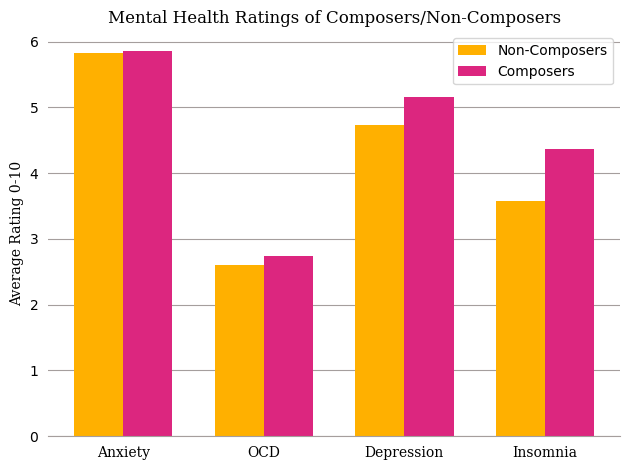

In [65]:
#Groupings of data of Composers vs non-composers
df_no = df[df['Composer'] == 'No'] 
df_yes = df[df['Composer'] == 'Yes'] 

#anxiety data
non_composer_anxiety = df_no["Anxiety"].tolist()
composer_anxiety = df_yes["Anxiety"].tolist()
mean_non_composer_anxiety = mean(non_composer_anxiety)
mean_composer_anxiety = mean(composer_anxiety)

#OCD data
non_composer_OCD = df_no["OCD"].tolist()
composer_OCD = df_yes["OCD"].tolist()
mean_non_composer_OCD = mean(non_composer_OCD)
mean_composer_OCD = mean(composer_OCD)

#depression data
non_composer_depression = df_no["Depression"].tolist()
composer_depression = df_yes["Depression"].tolist()
mean_non_composer_depression = mean(non_composer_depression)
mean_composer_depression = mean(composer_depression)

#Insomnia data
non_composer_insomnia = df_no["Insomnia"].tolist()
composer_insomnia = df_yes["Insomnia"].tolist()
mean_non_composer_insomnia = mean(non_composer_insomnia)
mean_composer_insomnia = mean(composer_insomnia)

sfont = {"fontname": "serif"}
labels = ["Anxiety", "OCD", "Depression", "Insomnia"]
yes_means = [mean_composer_anxiety, mean_composer_OCD, mean_composer_depression, mean_composer_insomnia]
no_means = [mean_non_composer_anxiety, mean_non_composer_OCD, mean_non_composer_depression, mean_non_composer_insomnia]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, no_means, width, label='Non-Composers', color="#FFB000")  # color blind friendly yellow
rects2 = ax.bar(x + width/2, yes_means, width, label='Composers', color="#DC267F")  # color blind friendly fuschia

ax.set_ylabel('Average Rating 0-10', **sfont)
ax.set_title('Mental Health Ratings of Composers/Non-Composers', **sfont)
ax.set_xticks(x, labels, **sfont)
ax.legend()


# spines are the top, bottom, left, right lines
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_color("#A59E9D")
ax.tick_params(bottom=False, left=False)  # gets rid on ticks on x and y axes
ax.set_axisbelow(True)  # puts axis lines below bars
ax.yaxis.grid(True, color="#A59E9D")  # adds y axis lines

fig.tight_layout()

plt.show()

This also shows that composers have worse mental health scores than non-composers.

## Hours Per Day Listening and Mental Health

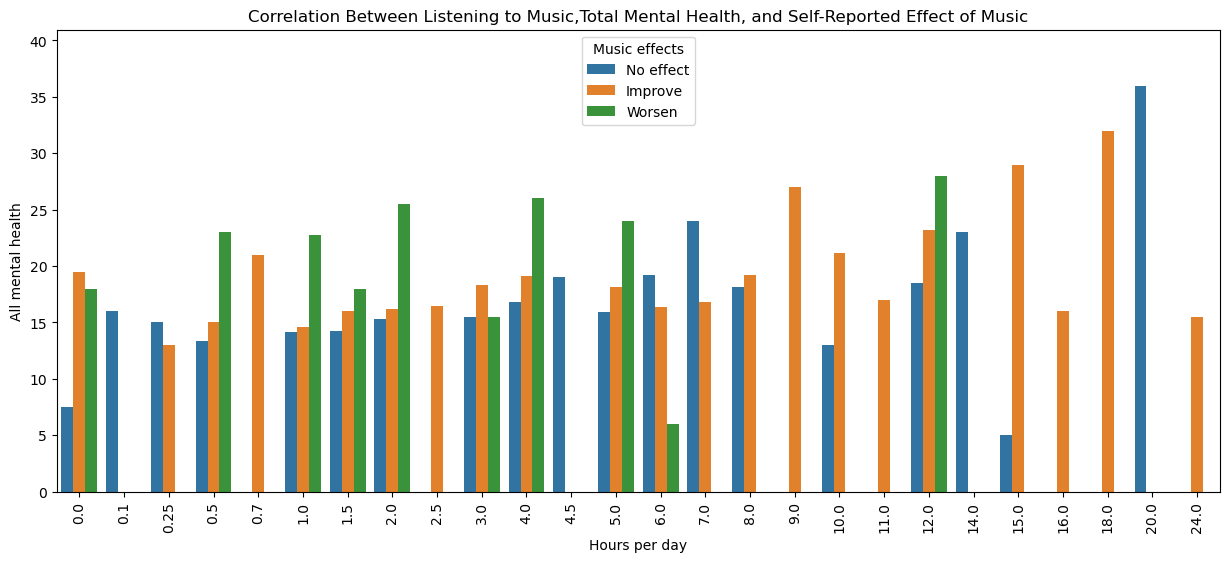

In [93]:
df["All mental health"] = df["OCD"] + df["Anxiety"] + df["Depression"] + df["Insomnia"]
plt.figure(figsize=(15,6))
sns.barplot(x=df['Hours per day'], y=df['All mental health'], hue=df['Music effects'], errwidth=0).set(title="Correlation Between Listening to Music,Total Mental Health, and Self-Reported Effect of Music")
plt.xticks(rotation=90)
plt.show()

This shows that those who listen to music 5 hours or less per day responded with a higher rate that music worsened their mental health.  Once you get past th3 5 hour mark, respondents mostly said music improved their mental health.

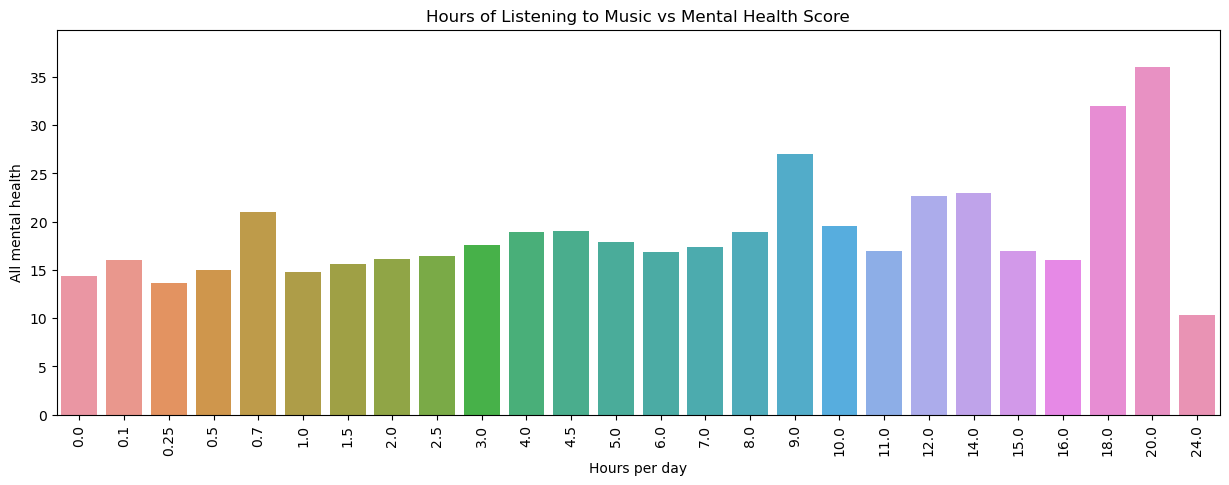

In [94]:
df["All mental health"] = df["OCD"] + df["Anxiety"] + df["Depression"] + df["Insomnia"]


plt.figure(figsize=(15,5))
sns.barplot(x=df['Hours per day'], y=df['All mental health'], errwidth=0).set(title="Hours of Listening to Music vs Mental Health Score")
plt.xticks(rotation=90)
plt.show()

Respondants who reported a greater amount of listening hours, reported mental health concerns at a greater rate.

## Genre Preference and Mental Health

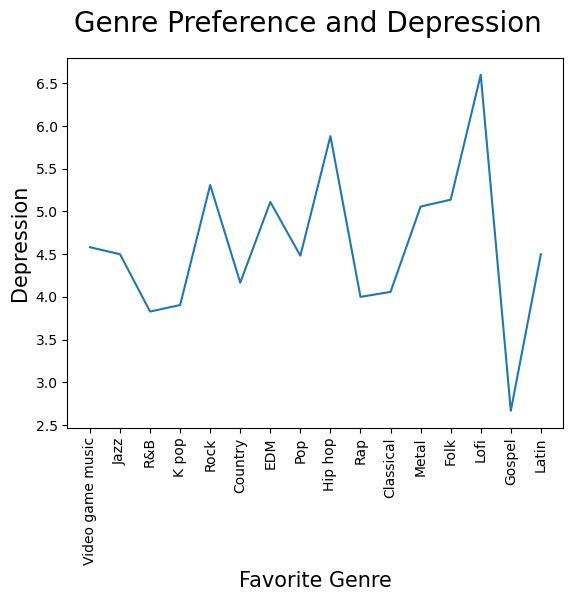

In [85]:
# Genre Preference and Depression
fig = sns.lineplot(x=df['Fav genre'], y=df['Depression'], ci=None)
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preference and Depression", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Depression', fontsize=15)
plt.show()

This breakdown shows that Lofi, HipHop, and Rock listeners have the highest reported depression and Gospel has the lowest.

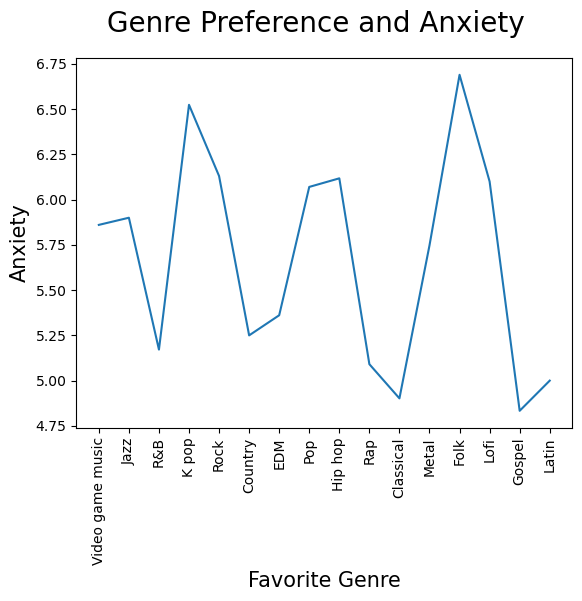

In [86]:
# Genre Preference and Depression
fig = sns.lineplot(x=df['Fav genre'], y=df['Anxiety'], ci=None)
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preference and Anxiety", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Anxiety', fontsize=15)
plt.show()

This breakdown shows that KPOP, Folk, HipHop, and Pop have the highest level of anxiety.  Clasical, Gospel, Country, and R&B listeners have the lowest levels of anxiety.

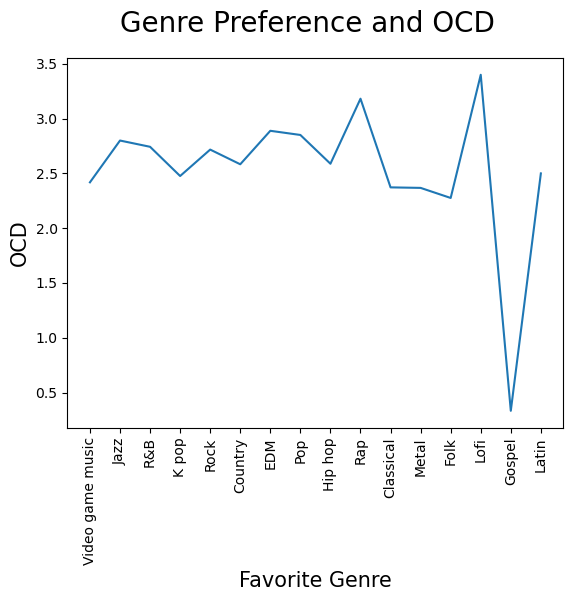

In [87]:
# Genre Preference and OCD
fig = sns.lineplot(x=df['Fav genre'], y=df['OCD'], ci=None)
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preference and OCD", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('OCD', fontsize=15)
plt.show()

For OCD, Lofi and Rap listeners have the highest reported levels of OCD and Gospel listeners the lowest.

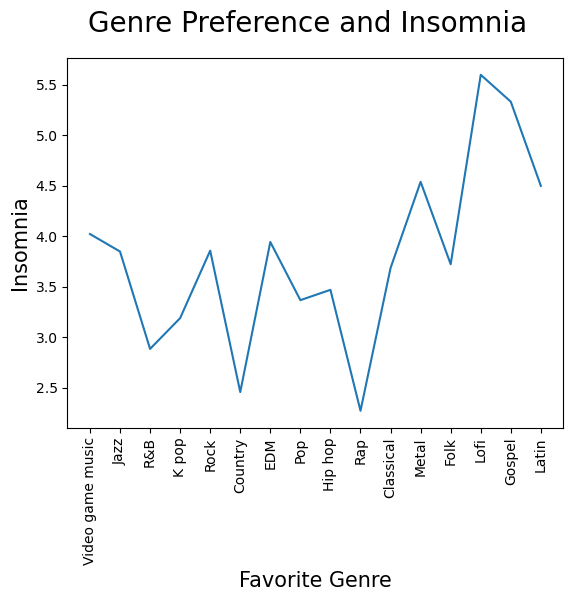

In [ ]:
# Genre Preference and Insomnia
fig = sns.lineplot(x=df['Fav genre'], y=df['Insomnia'], ci=None)
plt.xticks(rotation=90)
fig.figure.suptitle("Genre Preference and Insomnia", fontsize = 20)
plt.xlabel('Favorite Genre', fontsize=15)
plt.ylabel('Insomnia', fontsize=15)
plt.show()

This shows that those who listen to Country and Rap have the lowest reported levels of insomnia but those who listen to Metal and Lofi have the highest levels of insomnia.

# (3) Conclusion